In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train) ,(x_test,y_test) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_img = x_train[0]

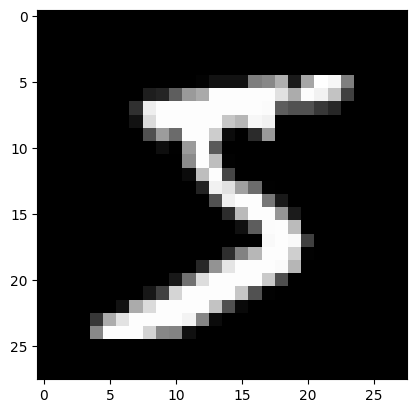

In [ ]:
plt.imshow(single_img, cmap="gray")

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# convert to one hot encoding
from keras.utils.np_utils import to_categorical

In [ ]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [ ]:
x_train = x_train / x_train.max()
x_test = x_test/ x_test.max()

In [ ]:
# reshape the data
x_train  = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 4ms/step - loss: 0.1357 - accuracy: 0.9593
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9862


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0444 - accuracy: 0.9854


[0.04441382363438606, 0.9854000210762024]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
prediction = model.predict(x_test)
predictions=np.argmax(prediction,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

